# Matter Power Spectrum

## Import Settings

In [1]:
import numpy as np
from classy import Class
import matplotlib as mpl
import matplotlib.pyplot as plt
# some plotting settings to make figures prettier :)
mpl.rcParams['text.usetex'] = False
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
#plt.rcParams["font.family"] = "Times New Roman"

## Config

In [16]:
def config_default():
    config = {'h': 0.67810, 'A_s': 2.100549e-09, 
                            'omega_b': 0.0238280, 
                            'omega_cdm': 0.1201075, 
                            'T_cmb': 2.7255,'z_pk': 0, 
                            'output' : 'tCl,pCl,lCl,mPk',
                            'lensing': 'yes', 'P_k_max_1/Mpc': 1., 'l_max_scalars': 2500,}
    return config

In [17]:
cosmo = Class() 
cosmo.set(config)
cosmo.compute()

# Matter Power Spectrum

In [8]:
kmin = 1e-3 # min wavenumber in units of Mpc^-1
kmax = 1e0 # max wavenumber 
nk = 100 # total number of wavenumbers to sample Pk
ks = np.geomspace(kmin, kmax, nk) # get array of nk wavenumbers from kmin to kmax
# geomspace: geometric space, 10^1, 10^2,...
z = 0.0 # redshift of Pk

In [9]:
%store -r viable_omega_b
%store -r viable_T_cmb

### P(k) w/ changing T_cmb

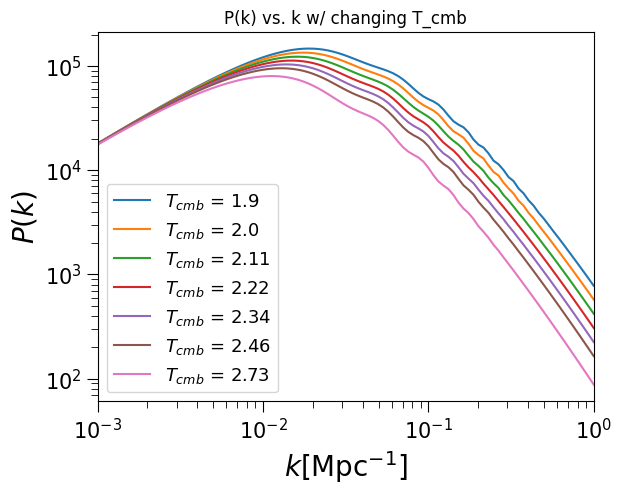

In [21]:
config = config_default() # set to default

# plotting the corresponding power spectrum 
for i in range(1, len(viable_T_cmb)):
    config.update({'T_cmb': viable_T_cmb[i]})
    cosmo = Class()
    cosmo.set(config)
    cosmo.compute()
    pk = np.array([cosmo.pk_lin(k, z) for k in ks]) # get linear power spectrum for each k and z provided
    plt.loglog(ks, pk, label = r"$T_{cmb}$" + f" = {round(config['T_cmb'], 2)}")
    
plt.legend()
plt.xlim(kmin, kmax)
plt.ylabel(r'$P(k)$')
plt.xlabel(r'$k \mathrm{[Mpc^{-1}]}$')
plt.title('P(k) vs. k w/ changing T_cmb')
plt.show()

### P(k) w/ changing $\Omega_b$

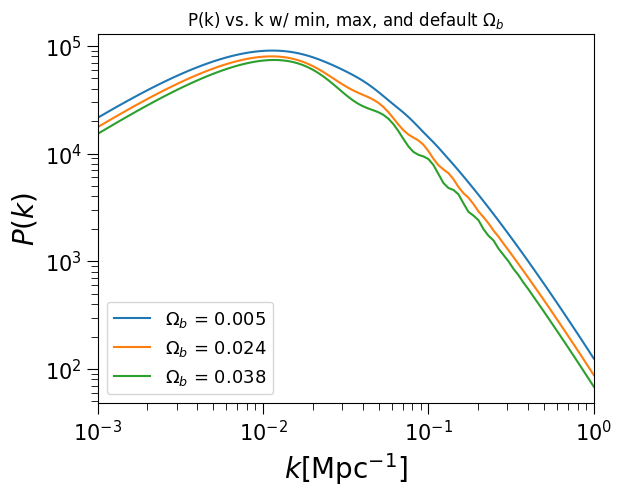

In [22]:
config = config_default() # set to default

omega_b_tries = [min(viable_omega_b), config['omega_b'], max(viable_omega_b)]

# plotting the corresponding power spectrum 
for i in range(len(omega_b_tries)):
    config.update({'omega_b': omega_b_tries[i]})
    cosmo = Class()
    cosmo.set(config)
    cosmo.compute()
    pk = np.array([cosmo.pk_lin(k, z) for k in ks]) # get linear power spectrum for each k and z provided
    plt.loglog(ks, pk, label = r"$\Omega_b$" + f" = {round(config['omega_b'], 3)}")
   
plt.legend()
plt.xlim(kmin, kmax)
plt.ylabel(r'$P(k)$')
plt.xlabel(r'$k \mathrm{[Mpc^{-1}]}$')
plt.title(r'P(k) vs. k w/ min, max, and default $\Omega_b$')
plt.show()

### P(k) w/ changing $\Omega_{cdm}$

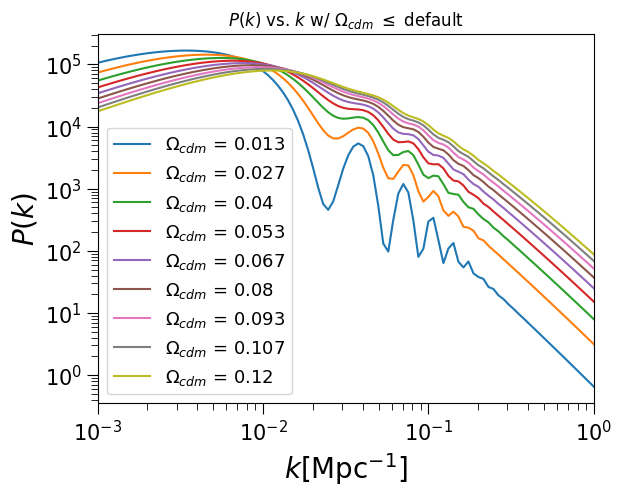

In [25]:
config = config_default() # set to default

omega_cdm_tries = np.linspace(0, config['omega_cdm'], 10)

for i in range(1, len(omega_cdm_tries)): # avoid 0 because it's weird
    config.update({'omega_cdm': omega_cdm_tries[i]})
    cosmo = Class()
    cosmo.set(config)
    cosmo.compute()
    pk = np.array([cosmo.pk_lin(k, z) for k in ks]) # get linear power spectrum for each k and z provided
    plt.loglog(ks, pk, label = r"$\Omega_{cdm}$" + f" = {round(config['omega_cdm'], 3)}")
   
plt.legend()
plt.xlim(kmin, kmax)
plt.ylabel(r'$P(k)$')
plt.xlabel(r'$k \mathrm{[Mpc^{-1}]}$')
plt.title(r'$P(k)$ vs. $k$ w/ $\Omega_{cdm}$ $\leq$ default')
plt.show()

1. what is power spectrum, why its shape/magnitude, implication on what the universe looks like (Find in Ryden)
2. (In code) changing an \omega, how does power spectrum change
3. Creating a gif(simple function) of power spectrum vs. time
4. Compare to RSI

RSI specific

1. Email lesgourge
2. user interface
3. understanding connection with class
4. adding slider for neutrino
5. produce nuanced interactions

Admin

1. Create repository and documentations on USC github

Timeline:

Generally liberal, do as much as I can. Each task can be done very deeply, and I can choose what tasks I want to do.